In [1]:
%%html  
<style>.cm-s-ipython .CodeMirror-matchingbracket { color: black !important;}</style><!-- Bob J: no green highlights -->
<style>table.dataframe th { vertical-align: top; }</style><!-- Move MultiIndex headers to top of block -->
<style>table.dataframe td, table.dataframe th { border-style: solid; border-width: thin; }</style><!-- thin border around tables -->

In [2]:
%%javascript  # Prefer to display output instead of scrolling, so it can print
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Standard definitions and options
import pandas as pd
from pandas import DataFrame
import os
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)
# widen the page to match the window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# full width display of tables
pd.options.display.max_columns = 50
# want to display all rows
pd.options.display.max_rows = None

In [4]:
import json
# read log in JSON form, as processed by i.e. transfer.php
with open('log.json', 'r') as f:
    samples_dict = json.load(f)

In [6]:
df = DataFrame()
for sample in samples_dict : 
        df = df.append(sample, ignore_index=True)

df.head(20)

,DATE,IP,REMOTE_HOST,host,item1,item2,item3,item4,user,file
0,2019-09-02 00:41:26,157.131.108.177,None,CSC2019,None,None,None,None,csc_student,NaN
1,2019-09-02 01:29:07,157.131.108.177,None,BobJacosensMBP2,setup,None,None,None,jake,NaN
2,2019-09-10 08:54:56,157.193.98.99,None,CSC2019,Willem,Person,None,None,csc_willem,NaN
3,2019-09-10 09:03:44,157.193.98.99,None,CSC2019,NaN,NaN,NaN,NaN,csc_willem,exercise1.tar
4,2019-09-10 09:05:09,157.193.98.99,None,CSC2019,NaN,NaN,NaN,NaN,csc_willem,exercise1.tar
5,2019-09-10 10:56:03,157.193.98.99,None,CSC2019,NaN,NaN,NaN,NaN,csc_willem,excersise2
6,2019-09-10 10:56:10,157.193.98.99,None,CSC2019,NaN,NaN,NaN,NaN,csc_willem,exercise2
7,2019-09-10 10:56:22,157.193.98.99,None,CSC2019,NaN,NaN,NaN,NaN,csc_willem,exercise_2.tar
8,2019-09-10 10:56:29,157.193.98.99,None,CSC2019,NaN,NaN,NaN,NaN,csc_willem,exercise2.tar
9,2019-09-10 12:13:21,157.193.98.99,None,CSC2019,NaN,NaN,NaN,NaN,csc_willem,exercise3.tar


In [13]:
# summarize columns
display(df.host.unique())
display(df.item1.unique())
display(df.IP.unique())
display(df.user.unique())

array(['CSC2019', 'BobJacosensMBP2', 'Bob-Jacobsens-MBP-2.local',
       'inst-3a-138', 'Joshs-MacBook-Air.local'], dtype=object)

array([None, 'setup', 'Willem', nan, 'team', 'Maciej', 'Sam',
       'Lukas Gedvilas', 'exercise', 'exerciseG1'], dtype=object)

array(['157.131.108.177', '157.193.98.99', '82.78.32.255',
       '193.231.20.94', '80.12.39.167'], dtype=object)

array(['csc_student', 'jake', 'csc_willem', 'csc_ciprian', 'csc_de',
       'csc_maciej', 'csc_chloe', 'csc_andrew', 'csc_cosmingabriel',
       'csc_felix', 'csc_robbie', 'csc_brendan', 'csc_enrico', 'csc_sam',
       'csc_daniel', 'csc_hevjin', 'csc_matteo', 'csc_devin',
       'csc_cedric', 'csc_danielj', 'csc_pablo', 'csc_fabian', 'csc_emil',
       'csc_cornelis', 'csc_miguel', 'csc_janik', 'anovak', 'csc_asier',
       'csc_toby', 'csc_kimmo', 'csc_ioannis', 'csc_stefano', 'csc_artem',
       'csc_saad', 'csc_diogo', 'csc_oliver', 'csc_narine',
       'csc_sebastiant', 'csc_sorin', 'csc_lukas', 'csc_carlos',
       'csc_surya', 'csc_kilian', 'csc_carlosp', 'joshfenech', 'csc_rita',
       'csc_triet', 'csc_lukasg', 'csc_yuval', 'csc_vladimir',
       'csc_ruchi', 'csc_javad', 'csc_sharad', 'csc_stefanie',
       'csc_michael', 'csc_andrzej', 'csc_pedro', 'csc_david', 'csc_petr',
       'csc_caio', 'csc_jubna', 'csc_michele', 'csc_armenuhi',
       'csc_yunsheng', 'csc_julien'], d

In [30]:
# most recent 'setup'
t1 = df[df.item1 == 'setup']
display(t1.user.unique())
t1.drop_duplicates(['user'], keep='last').sort_values(['DATE'])

array(['jake', 'csc_ciprian', 'csc_de', 'csc_chloe', 'csc_andrew',
       'csc_cosmingabriel', 'csc_felix', 'csc_robbie', 'csc_enrico',
       'csc_sam', 'csc_daniel', 'csc_hevjin', 'csc_matteo', 'csc_devin',
       'csc_cedric', 'csc_willem', 'csc_maciej', 'csc_danielj',
       'csc_pablo', 'csc_fabian', 'csc_emil', 'csc_cornelis',
       'csc_miguel', 'csc_janik', 'anovak', 'csc_toby', 'csc_kimmo',
       'csc_ioannis', 'csc_stefano', 'csc_artem', 'csc_saad', 'csc_diogo',
       'csc_oliver', 'csc_narine', 'csc_sebastiant', 'csc_sorin',
       'csc_lukas', 'csc_surya', 'joshfenech', 'csc_rita', 'csc_lukasg',
       'csc_yuval', 'csc_vladimir', 'csc_ruchi', 'csc_javad',
       'csc_stefanie', 'csc_andrzej', 'csc_pedro', 'csc_jubna',
       'csc_michele', 'csc_armenuhi', 'csc_yunsheng', 'csc_julien'],
      dtype=object)

,DATE,IP,REMOTE_HOST,host,item1,item2,item3,item4,user,file
19,2019-09-14 17:36:58,82.78.32.255,None,Bob-Jacobsens-MBP-2.local,setup,None,None,None,jake,NaN
21,2019-09-16 19:35:25,82.78.32.255,None,CSC2019,setup,None,None,None,csc_ciprian,NaN
24,2019-09-16 21:07:54,82.78.32.255,None,CSC2019,setup,None,None,None,csc_de,NaN
28,2019-09-17 05:55:16,193.231.20.94,None,CSC2019,setup,None,None,None,csc_chloe,NaN
31,2019-09-17 05:55:49,193.231.20.94,None,CSC2019,setup,None,None,None,csc_cosmingabriel,NaN
32,2019-09-17 05:55:55,193.231.20.94,None,CSC2019,setup,None,None,None,csc_felix,NaN
33,2019-09-17 05:56:01,193.231.20.94,None,CSC2019,setup,None,None,None,csc_robbie,NaN
36,2019-09-17 05:57:22,193.231.20.94,None,CSC2019,setup,None,None,None,csc_enrico,NaN
38,2019-09-17 05:58:30,193.231.20.94,None,CSC2019,setup,None,None,None,csc_sam,NaN
40,2019-09-17 05:58:43,193.231.20.94,None,CSC2019,setup,None,None,None,csc_daniel,NaN


In [38]:
# most recent 'file'
t1 = df[df.file.notnull()]
t2 = t1.drop_duplicates(['user'], keep='last').sort_values(['user'])
t2[['DATE','user','file']]

,DATE,user,file
168,2019-09-17 06:31:26,anovak,exercise1.tar
392,2019-09-17 08:39:18,csc_andrew,exerciseM2A.tar
319,2019-09-17 08:00:08,csc_andrzej,exercise5.tar
385,2019-09-17 08:33:39,csc_armenuhi,exercise5.tar
394,2019-09-17 08:45:19,csc_asier,exerciseM2A.tar
371,2019-09-17 08:25:29,csc_brendan,exercise5.tar
336,2019-09-17 08:07:59,csc_caio,exerciseD.tar
398,2019-09-17 08:47:14,csc_carlos,exercise3.tar
320,2019-09-17 08:00:12,csc_carlosp,exercise3.tar
370,2019-09-17 08:24:25,csc_chloe,exercise5.tar


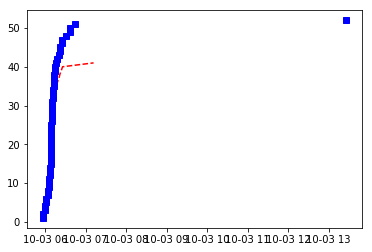

In [20]:
xa = []
ya = []
cnt = 0
for sample in samples_dict:
    try:
        if (sample["item1"] == "team") :
            xa.append(datetime.strptime(sample["DATE"], "%Y-%m-%d %H:%M:%S"))
            cnt = cnt+1
            ya.append(cnt)
    except KeyError: 
        ;
xt = np.array(xa)
yt = np.array(ya)

xa = []
ya = []
cnt = 0
for sample in samples_dict:
    try:
        if (sample["file"] == "exercise1.tar") :
            xa.append(datetime.strptime(sample["DATE"], "%Y-%m-%d %H:%M:%S"))
            cnt = cnt+1
            ya.append(cnt)
    except KeyError: 
        ;
x1 = np.array(xa)
y1 = np.array(ya)
plt.plot(xt, yt, 'r--', x1, y1, 'bs')
plt.show()


csc_luigi
malte
csc_vytautas
csc_malte
csc_henrik
csc_william
csc_jakub
csc_vojtech
csc_javier
csc_johann
csc_peter
csc_mikkel
csc_tiago
csc_igor
csc_wojciech
csc_riccardo
mconcas
csc_piotr
csc_rizalina
csc_nikitas
mic4ael
csc_freja
csc_daniell
csc_michael
csc_luisa
csc_knut
csc_sebastien
csc_filip
csc_eirik
csc_maciej
Paul
csc_omar
csc_aris
csc_andreasm
csc_tetiana
csc_christoph
csc_alexander
csc_eric
csc_stefan
csc_bernhard
csc_paul
csc_nicholai
csc_rabi
csc_bob
csc_daniel
luigipertoldi
csc_petar
csc_michal
csc_alexanderl
csc_laura
csc_julien
csc_remi
csc_trine
csc_fudong
csc_dmitrii
$
csc_adrian
csc_iago
csc_knuto
csc_elena
csc_marcus
csc_giorgio
csc_patrick
csc_vaggelis


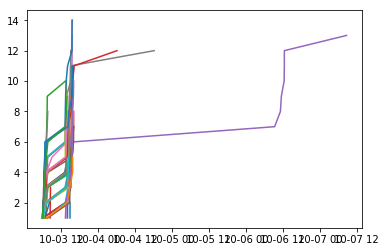

In [21]:
# list of lists
data = {}

for sample in samples_dict:
    data[sample["user"]] = {}

# note this is latest time if multiple; you want earliest
for sample in samples_dict:
    try:
        data[sample["user"]][sample["file"]] = datetime.strptime(sample["DATE"], "%Y-%m-%d %H:%M:%S")
    except KeyError: 
        ;

for user in data:
    xa = []
    print(user)
    for filename in data[user]:
        # print ("  "+filename+"  "+str(data[user][filename]))
        xa.append(data[user][filename])
    x = np.array(xa)
    x.sort()
    y = np.arange(1,len(x)+1)
    plt.plot(x, y)

plt.show()

In [22]:
exercises = {
    "exercise1.tar": "Testing 1",
    "exercise2.tar": "Testing 2 JUava",
    "exerciseD.tar": "Testing 3 CppUnit",
    "exercise3.tar": "Profiling 1",
    "exercise4.tar": "Profiling 2",
    "exercise5.tar": "Memory",
    "exerciseC.tar": "SVN",
    "exG2script.sh": "Git 2",
    "exG3script.sh": "Git 3",
    "exerciseM1.tar": "CMake 1",
    "exerciseM2.tar": "CMake 2",
    "exercise7.tar": "CMT 1",
    "exercise8.tar": "CMT 2",
    "exercise9.tar": "CMT 3",
    "cmt-dev-all.tgz": 10
}

exercises = {
    "exercise1.tar": 1,
    "exercise2.tar": 2,
    "exerciseD.tar": 3,
    "exercise3.tar": 4,
    "exercise4.tar": 5,
    "exercise5.tar": 6,
    "exerciseC.tar": 7,
    "exG2script.sh": 8,
    "exG3script.sh": 9,
    "exerciseM1.tar": 10,
    "exerciseM2.tar": 11,
    "exercise7.tar": 12,
    "exercise8.tar": 13,
    "exercise9.tar": 14,
    "cmt-dev-all.tgz": 15
}

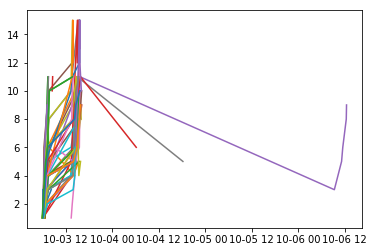

In [18]:
# list of lists
data = {}

for sample in samples_dict:
    data[sample["user"]] = {}

# note this is latest time if multiple; you want earliest
for sample in samples_dict:
    try:
        data[sample["user"]][exercises[sample["file"]]] = datetime.strptime(sample["DATE"], "%Y-%m-%d %H:%M:%S")
    except KeyError: 
        ;

for user in data:
    xa = []
    ya = []
    # print(user)
    for exercise in data[user]:
        # print ("  "+str(exercise)+"  "+str(data[user][exercise]))
        xa.append(data[user][exercise])
        ya.append(exercise)
    x = np.array(xa)
    y = np.array(ya)
    order = np.argsort(x)
    x = np.array(x)[order]
    y = np.array(y)[order]
    plt.plot(x, y)

plt.show()